# Exp 11: Image generation using GAN

In [1]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf

C:\Users\JAWAHAR A S\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
from tensorflow.keras import layers

In [11]:
def build_generator(latent_dim):
 model = tf.keras.Sequential()
 model.add(layers.Dense(128, input_dim=latent_dim, activation='relu'))
 model.add(layers.BatchNormalization())
 model.add(layers.Dense(784, activation='sigmoid'))
 model.add(layers.Reshape((28, 28, 1)))
 return model

In [12]:
def build_discriminator(img_shape):
 model = tf.keras.Sequential()
 model.add(layers.Flatten(input_shape=img_shape))
 model.add(layers.Dense(128, activation='relu'))
 model.add(layers.Dense(1, activation='sigmoid'))
 return model

In [13]:
def build_gan(generator, discriminator):
 discriminator.trainable = False
 model = tf.keras.Sequential()
 model.add(generator)
 model.add(discriminator)
 return model

In [14]:
def load_dataset():
 (X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
 X_train = X_train / 255.0
 X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
 return X_train

In [21]:
def train_gan(generator, discriminator, gan, X_train, latent_dim, epochs=100, batch_size=128):
 for epoch in range(epochs):
     idx = np.random.randint(0, X_train.shape[0], batch_size)
     real_imgs = X_train[idx]
     fake_imgs = generator.predict(np.random.randn(batch_size, latent_dim))
     labels_real = np.ones((batch_size, 1))
     labels_fake = np.zeros((batch_size, 1))
     d_loss_real = discriminator.train_on_batch(real_imgs, labels_real)
     d_loss_fake = discriminator.train_on_batch(fake_imgs, labels_fake)
     d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
     noise = np.random.randn(batch_size, latent_dim)
     labels_gen = np.ones((batch_size, 1))
     g_loss = gan.train_on_batch(noise, labels_gen)
     if epoch % 100 == 0:
         print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")
         save_generated_images(generator, epoch, latent_dim)


In [22]:
def save_generated_images(generator, epoch, latent_dim, examples=10, dim=(1, 10), figsize=(10, 1)):
 noise = np.random.randn(examples, latent_dim)
 generated_images = generator.predict(noise)
 generated_images = generated_images.reshape(examples, 28, 28)
 plt.figure(figsize=figsize)
 for i in range(generated_images.shape[0]):
     plt.subplot(dim[0], dim[1], i+1)
     plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
     plt.axis('off')
     plt.tight_layout()
     plt.savefig(f"gan_generated_image_epoch_{epoch}.png")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Epoch 0, D Loss: 0.830321192741394, G Loss: [array(1.0715116, dtype=float32), array(1.0715116, dtype=float32), array(0.41796875, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━

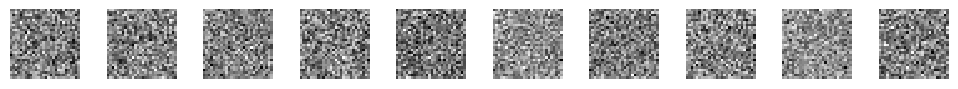

In [23]:
def main():
 latent_dim = 100
 img_shape = (28, 28, 1)
 generator = build_generator(latent_dim)
 discriminator = build_discriminator(img_shape)
 gan = build_gan(generator, discriminator)
 X_train = load_dataset()
 discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 gan.compile(loss='binary_crossentropy', optimizer='adam')
 train_gan(generator, discriminator, gan, X_train, latent_dim)
if __name__ == "__main__":
 main()

# Exp 12: Train a deep learning model to classify given image using pre trained                  model

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [31]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 49s 0us/step
3670


In [32]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))
PIL.Image.open(str(roses[1]))
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))
PIL.Image.open(str(tulips[1]))
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, 
subset="training", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, 
subset="validation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [33]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

(32, 180, 180, 3)
(32,)


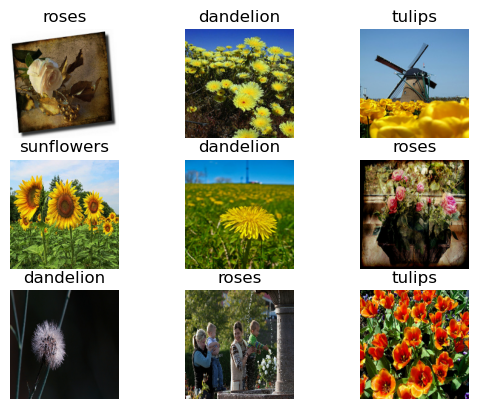

In [34]:
for images, labels in train_ds.take(1):
 for i in range(9):
     ax = plt.subplot(3, 3, i + 1)
     plt.imshow(images[i].numpy().astype("uint8"))
     plt.title(class_names[labels[i]])
     plt.axis("off")
for image_batch, labels_batch in train_ds:
 print(image_batch.shape)
 print(labels_batch.shape)
 break

0.0 0.9995425


C:\Users\JAWAHAR A S\anaconda3\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
92/92 ━━━━━━━━━━━━━━━━━━━━ 115s 305ms/step - accuracy: 0.3493 - loss: 1.8384 - val_accuracy: 0.5300 - val_loss: 1.1272
Epoch 2/4
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 207ms/step - accuracy: 0.6314 - loss: 0.9812 - val_accuracy: 0.6049 - val_loss: 0.9933
Epoch 3/4
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.6984 - loss: 0.7979 - val_accuracy: 0.6485 - val_loss: 0.9057
Epoch 4/4
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - accuracy: 0.7904 - loss: 0.5719 - val_accuracy: 0.6390 - val_loss: 0.9813


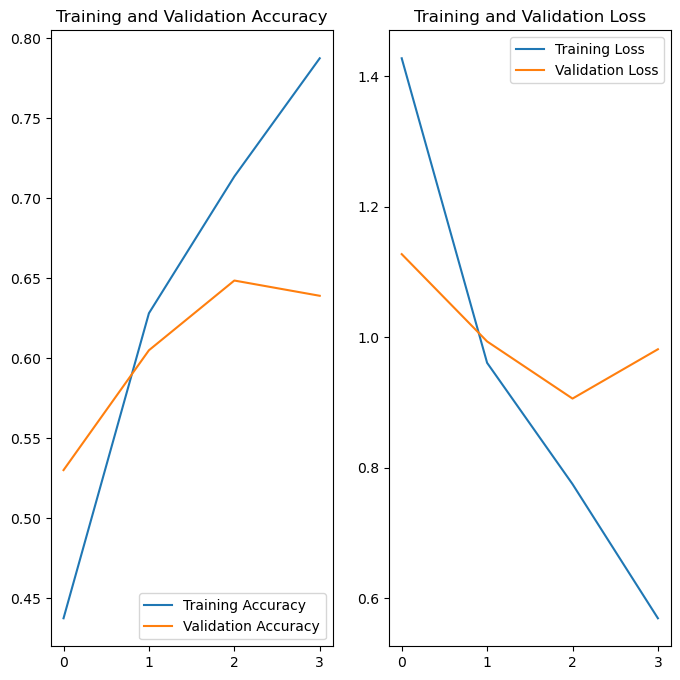

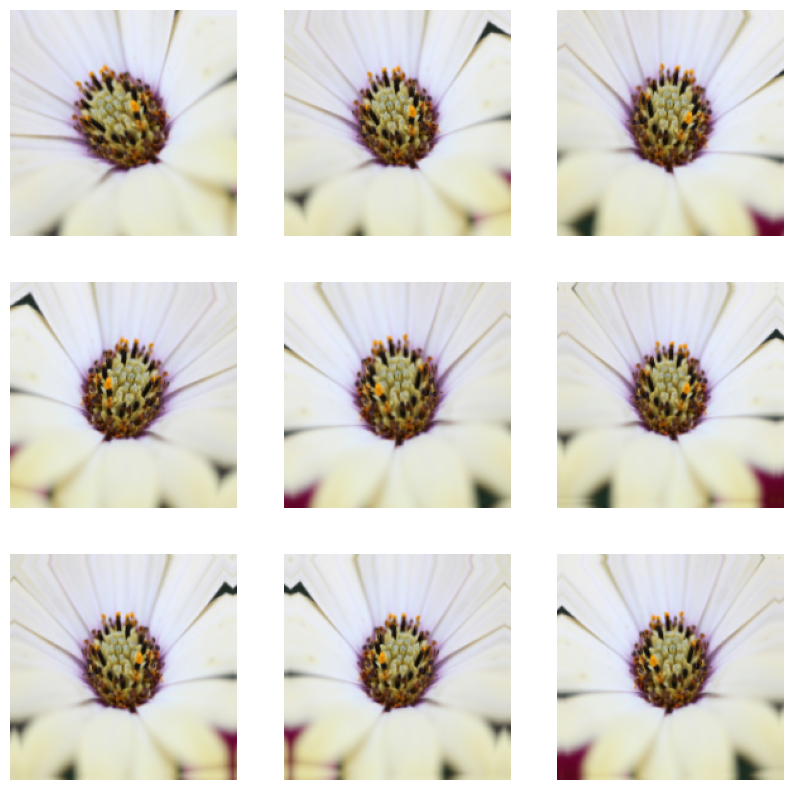

In [35]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))
num_classes = len(class_names)
model = Sequential([
 layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(num_classes)
])
model.compile(optimizer='adam', 
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()
epochs = 4
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
data_augmentation = keras.Sequential([
 layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.1),
])
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
 for i in range(9):
     augmented_images = data_augmentation(images)
     ax = plt.subplot(3, 3, i + 1)
     plt.imshow(augmented_images[0].numpy().astype("uint8"))
     plt.axis("off")


# Exp 13: Recommendation system from sales data using deep learning

In [37]:
pip install faker

Note: you may need to restart the kernel to use updated packages.Collecting faker
     ---------------------------------------- 1.8/1.8 MB 845.4 kB/s eta 0:00:00



In [38]:
import pandas as pd
import numpy as np
from faker import Faker
import random
import datetime

In [39]:
fake = Faker()
num_users = 100
users = [fake.name() for _ in range(num_users)]
num_items = 50
items = [fake.word() for _ in range(num_items)]
num_transactions = 500
data = {
 'user': [random.choice(users) for _ in range(num_transactions)],
 'item': [random.choice(items) for _ in range(num_transactions)],
 'purchase': [random.choice([0, 1]) for _ in range(num_transactions)],
 'timestamp': [fake.date_time_between(start_date="-1y", end_date="now") for _ in 
range(num_transactions)]
}
sales_data = pd.DataFrame(data)
sales_data.to_csv('sample_sales_data.csv', index=False)
print(sales_data.head())


                        user      item  purchase           timestamp
0           Zachary Richards  consider         0 2023-12-17 15:40:47
1  Mr. Lawrence Valencia DVM     offer         1 2024-03-09 05:38:18
2            Cynthia Ramirez      care         1 2023-12-19 04:17:05
3          Elizabeth Stewart   various         1 2024-09-29 06:48:08
4              Harry Harrell      wind         0 2024-10-23 07:51:38


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate

In [42]:
data = pd.read_csv('sample_sales_data.csv')
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()
data['user_id'] = user_encoder.fit_transform(data['user'])
data['item_id'] = item_encoder.fit_transform(data['item'])
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [43]:
def create_model(num_users, num_items, embedding_size=50):
 user_input = Input(shape=(1,), name='user_input')
 item_input = Input(shape=(1,), name='item_input')
 user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, 
input_length=1)(user_input)
 item_embedding = Embedding(input_dim=num_items, output_dim=embedding_size, 
input_length=1)(item_input)
 user_flatten = Flatten()(user_embedding)
 item_flatten = Flatten()(item_embedding)
 concat = Concatenate()([user_flatten, item_flatten])
 dense1 = Dense(128, activation='relu')(concat)
 dense2 = Dense(64, activation='relu')(dense1)
 output = Dense(1, activation='sigmoid')(dense2)
 model = Model(inputs=[user_input, item_input], outputs=output)
 model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 return model

In [44]:
num_users = len(data['user_id'].unique())
num_items = len(data['item_id'].unique())
model = create_model(num_users, num_items)
model.summary()
train_user = train_data['user_id'].values
train_item = train_data['item_id'].values
train_labels = train_data['purchase'].values
model.fit([train_user, train_item], train_labels, epochs=5, batch_size=64, validation_split=0.2)

C:\Users\JAWAHAR A S\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 50)     │      5,000 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 50)     │      2,400 │ item_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 50)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 50)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 100)       │          0 │ flatten_3[0][0],  │
│ (Concatenate)       │                   │            │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 128)       │     12,928 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 64)        │      8,256 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 1)         │         65 │ dense_11[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 28,649 (111.91 KB)

 Trainable params: 28,649 (111.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 149s 5s/step - accuracy: 0.4964 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.5275 - loss: 0.6877 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 355ms/step - accuracy: 0.5729 - loss: 0.6821 - val_accuracy: 0.4875 - val_loss: 0.6933
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6251 - loss: 0.6747 - val_accuracy: 0.4625 - val_loss: 0.6940
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 363ms/step - accuracy: 0.6510 - loss: 0.6657 - val_accuracy: 0.4375 - val_loss: 0.6948


In [45]:
test_user = test_data['user_id'].values
test_item = test_data['item_id'].values
test_labels = test_data['purchase'].values
accuracy = model.evaluate([test_user, test_item], test_labels)
print(f'Test Accuracy: {accuracy[1]*100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 313ms/step - accuracy: 0.3859 - loss: 0.7080
Test Accuracy: 41.00%


# Exp 14: Implement object Detection using CNN

In [2]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt 

C:\Users\JAWAHAR A S\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() 
train_images, test_images = train_images / 255.0, test_images / 255.0 
model= models.Sequential([ layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), 
layers.MaxPooling2D((2, 2)), layers.Conv2D(64, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)), 
layers.Conv2D(64, (3, 3), activation='relu') 
])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 54s 0us/step


C:\Users\JAWAHAR A S\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 - 2s - 5ms/step - accuracy: 0.0331 - loss: 4.1647
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.6934 - loss: 0.8881 - val_accuracy: 0.6995 - val_loss: 0.9613
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8419 - loss: 0.4593 - val_accuracy: 0.6968 - val_loss: 0.9772
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8538 - loss: 0.4170 - val_accuracy: 0.7140 - val_loss: 0.9710
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8604 - loss: 0.3946 - val_accuracy: 0.6959 - val_loss: 1.0377
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8673 - loss: 0.3756 - val_accuracy: 0.7002 - val_loss: 1.0807
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8764 - loss: 0.3489 - val_accuracy: 0.7057 - val_loss: 1.0650
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8875 - loss: 0.3268 - val_accuracy: 0.7116 - val_loss: 1.1009
Epoch 8/10
1563/15

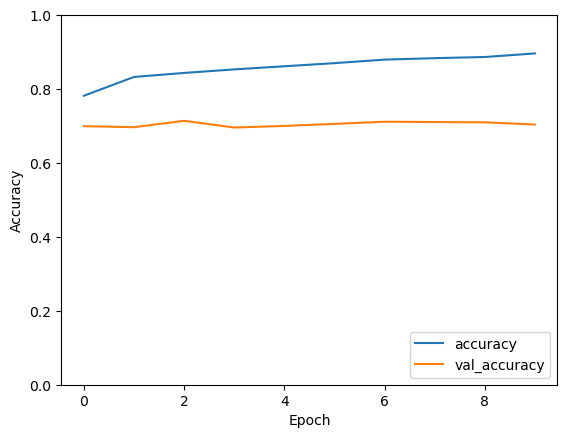

In [9]:
model.add(layers.Flatten()), model.add(layers.Dense(64, activation='relu')), 
model.add(layers.Dense(10)) 
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels)) 
plt.plot(history.history['accuracy'], label='accuracy') 
plt.plot(history.history['val_accuracy'], label = 'val_accuracy') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy') 
plt.ylim([0, 1]) 
plt.legend(loc='lower right') 
plt.show() 

In [10]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.03310000151395798


# Exp 15: Implement any simple Reinforcement Algorithm for an NLP problem

In [11]:
!pip install SpeechRecognition pydub

     ---------------------------------------- 32.8/32.8 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 64.9/64.9 kB 581.8 kB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [12]:
import speech_recognition as sr

In [13]:
recognizer = sr.Recognizer()

In [19]:
audio_file_path = 'harvard.wav'

In [20]:
with sr.AudioFile(audio_file_path) as source:
 audio_data = recognizer.record(source)

In [24]:
try:
 text = recognizer.recognize_google(audio_data)
 print("Recognized text:", text)
except sr.UnknownValueError:
 print("Google Speech Recognition could not understand audio")
except sr.RequestError as e:
 print(f"Could not request results from Google Speech Recognition service {e}")

Recognized text: the still smell of old buildings it takes heat to bring out the order a cold storage find with him tacos Alpha store are my favourite is just for food is the hard cross bun
